# **Preparation**

In [ ]:
# Import library yang dibutuhkan
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import display

# **Load Model U-Net**

# **Predict Image**

In [ ]:
# Load model U-Net yang telah disimpan
model_path = '/content/unet_model.h5'
model = load_model(model_path, compile=False)
print("Model berhasil dimuat.")

Model berhasil dimuat.


In [ ]:
# Atur ukuran gambar
IMG_HEIGHT = 128
IMG_WIDTH = 128

Saving Malaria 6.png to Malaria 6.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


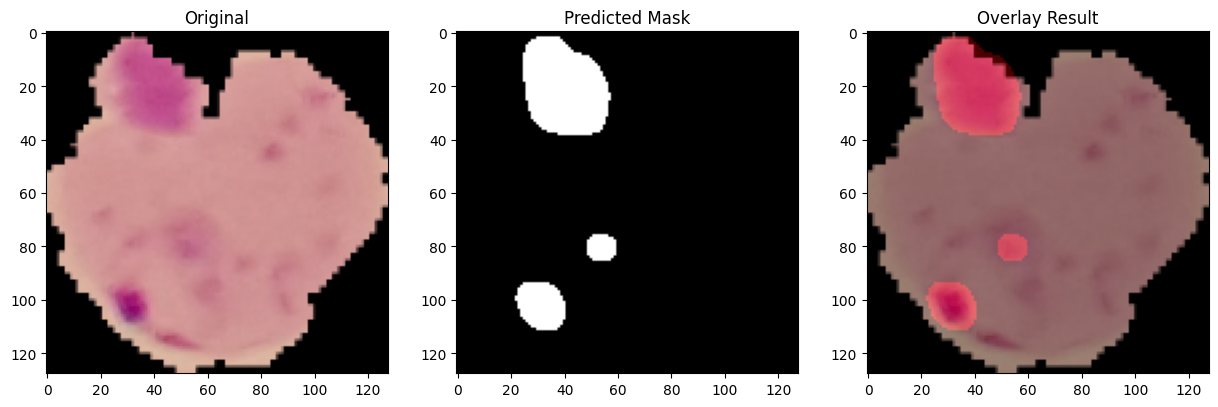

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Upload Gambar
uploaded = files.upload()

for filename in uploaded.keys():
    # Baca dan preprocessing gambar
    img = cv2.imread(filename)
    img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img_norm = img_resized / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    # Prediksi
    pred_mask = model.predict(img_input)[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8)
    pred_mask = np.squeeze(pred_mask)

    # Overlay dengan warna merah
    mask_colored = np.zeros_like(img_resized)
    mask_colored[:, :, 2] = pred_mask * 255  # Merah

    overlay = cv2.addWeighted(img_resized, 0.7, mask_colored, 0.3, 0)

    # Visualisasi
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title("Original")

    plt.subplot(1, 3, 2)
    plt.imshow(pred_mask, cmap='gray')
    plt.title("Predicted Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Overlay Result")

    plt.show()

    # Simpan gambar hasil segmentasi
    output_filename = f"overlay_{os.path.basename(filename)}"
    cv2.imwrite(output_filename, overlay)
    files.download(output_filename)

# **Dice Score Metrics**

In [ ]:
# # Dice loss function
# def dice_loss(y_true, y_pred):
#     smooth = 1e-6
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return 1 - ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))

# # Dice score coef
# def dice_coef(y_true, y_pred):
#     smooth = 1e-6
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [ ]:
# # Fungsi untuk prediksi dan preview
# def predict_and_plot(img_array, original_filename="Gambar"):
#     # Resize dan normalisasi
#     img_resized = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
#     img_norm = img_resized / 255.0
#     img_input = np.expand_dims(img_norm, axis=0)

#     # Prediksi
#     pred_mask = model.predict(img_input)[0]
#     pred_mask_bin = (pred_mask > 0.5).astype(np.uint8)

#     # Plot hasil
#     plt.figure(figsize=(12, 4))

#     plt.subplot(1, 3, 1)
#     plt.title(f"{original_filename} (RGB)")
#     plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
#     plt.axis('off')

#     plt.subplot(1, 3, 2)
#     plt.title("Mask Prediksi")
#     plt.imshow(pred_mask.squeeze(), cmap='gray')
#     plt.axis('off')

#     plt.subplot(1, 3, 3)
#     plt.title("Mask Biner (>0.5)")
#     plt.imshow(pred_mask_bin.squeeze(), cmap='gray')
#     plt.axis('off')

#     plt.tight_layout()
#     plt.show()

## **Upload Image**

In [ ]:
# # Masukan gambar sel darah merah yang terinfeksi
# print("Silakan upload gambar sel darah (format .png/.jpg/.jpeg)...")
# uploaded = files.upload()

# for fname in uploaded.keys():
#     print(f"File diterima: {fname}")
#     # Baca gambar dari file upload
#     image_stream = io.BytesIO(uploaded[fname])
#     pil_image = Image.open(image_stream).convert('RGB')
#     img_array = np.array(pil_image)
#     predict_and_plot(img_array, original_filename=fname)